# Deep neural network with one  hidden layer having 50 neurons ,100 neurons and 500 neurons

In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel

import lightgbm as lgbm
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [23]:
df=pd.read_excel('CMRfullDataset.xlsx')
#df_t=pd.read_csv('test_data.csv')
#print(df_t.head())
df.head()
df_train = df.drop(['MBID of the recording', 'Name','Artist','Release+Volume','Lead Instrument Code','Raaga'], axis = 1)

In [24]:
X=df_train.drop('Taala',axis=1).values
y=df_train['Taala'].values
print(X.shape)
print(y.shape)
#X_test=df_t.drop('label',axis=1).values
#y_test=df_t['label'].values


(176, 7)
(176,)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=42)

In [26]:
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense,Dropout,Input
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
from keras.models import Model
from keras.activations import relu
from keras.callbacks import History 
from keras.utils.vis_utils import plot_model
from keras.optimizers import Adam

In [27]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)
input_shape=X_train.shape[1]
y_train_nn=to_categorical(y_train,10,'int')
y_train_nn[:5]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [28]:
hist = History()

# 1 hidden layer with 50 neurons relu activation

In [29]:
inp=Input(shape=(input_shape,))
model = Dense(50,activation='relu')(inp)
model = Dropout(0.3)(model)

model = Dense(10,activation='softmax')(model)

model = Model(inputs=inp,outputs=model)
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
lr=ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=3,verbose=1)
es=EarlyStopping(monitor='val_loss',patience=20,verbose=1)


In [9]:
model.fit(X_train, y_train_nn, epochs = 20, validation_split = .30, callbacks = [hist,lr,es])

Epoch 1/20
3/3 [==============================] - 0s 118ms/step - loss: 2.2714 - accuracy: 0.0978 - val_loss: 2.3782 - val_accuracy: 0.0500
Epoch 2/20
3/3 [==============================] - 0s 11ms/step - loss: 2.2058 - accuracy: 0.0761 - val_loss: 2.3371 - val_accuracy: 0.0500
Epoch 3/20
3/3 [==============================] - 0s 15ms/step - loss: 2.2045 - accuracy: 0.1413 - val_loss: 2.2984 - val_accuracy: 0.2250
Epoch 4/20
3/3 [==============================] - 0s 15ms/step - loss: 2.1718 - accuracy: 0.1957 - val_loss: 2.2633 - val_accuracy: 0.2000
Epoch 5/20
3/3 [==============================] - 0s 14ms/step - loss: 2.0924 - accuracy: 0.2500 - val_loss: 2.2296 - val_accuracy: 0.2500
Epoch 6/20
3/3 [==============================] - 0s 12ms/step - loss: 2.0028 - accuracy: 0.4022 - val_loss: 2.1959 - val_accuracy: 0.2750
Epoch 7/20
3/3 [==============================] - 0s 14ms/step - loss: 1.9708 - accuracy: 0.3370 - val_loss: 2.1658 - val_accuracy: 0.2750
Epoch 8/20
3/3 [==========

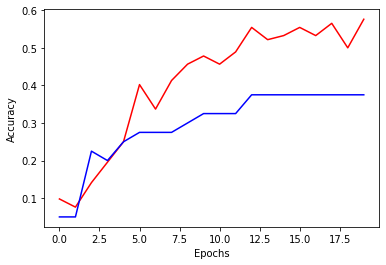

In [10]:
plt.plot(hist.history['accuracy'], color = 'red')
plt.plot(hist.history['val_accuracy'], color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# 1 hidden layer with 100 neurons relu activation

In [12]:
inp=Input(shape=(input_shape,))
model = Dense(100,activation='relu')(inp)
model = Dropout(0.3)(model)

model = Dense(10,activation='softmax')(model)

model = Model(inputs=inp,outputs=model)
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
lr=ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=3,verbose=1)
es=EarlyStopping(monitor='val_loss',patience=20,verbose=1)

In [13]:
model.fit(X_train, y_train_nn, epochs = 20, validation_split = .30, callbacks = [hist,lr,es])

Epoch 1/20
3/3 [==============================] - 0s 88ms/step - loss: 2.3102 - accuracy: 0.1630 - val_loss: 2.2458 - val_accuracy: 0.3000
Epoch 2/20
3/3 [==============================] - 0s 11ms/step - loss: 2.1843 - accuracy: 0.2174 - val_loss: 2.1761 - val_accuracy: 0.3500
Epoch 3/20
3/3 [==============================] - 0s 13ms/step - loss: 2.0960 - accuracy: 0.3587 - val_loss: 2.1146 - val_accuracy: 0.4750
Epoch 4/20
3/3 [==============================] - 0s 16ms/step - loss: 2.0536 - accuracy: 0.3261 - val_loss: 2.0564 - val_accuracy: 0.4750
Epoch 5/20
3/3 [==============================] - 0s 16ms/step - loss: 1.9579 - accuracy: 0.4239 - val_loss: 2.0032 - val_accuracy: 0.4750
Epoch 6/20
3/3 [==============================] - 0s 14ms/step - loss: 1.8569 - accuracy: 0.5000 - val_loss: 1.9565 - val_accuracy: 0.4500
Epoch 7/20
3/3 [==============================] - 0s 17ms/step - loss: 1.8443 - accuracy: 0.4565 - val_loss: 1.9147 - val_accuracy: 0.4500
Epoch 8/20
3/3 [===========

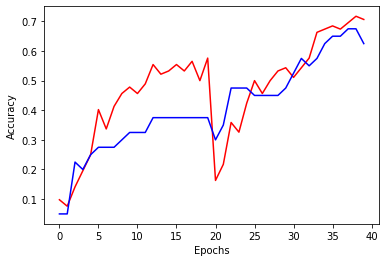

In [14]:
plt.plot(hist.history['accuracy'], color = 'red')
plt.plot(hist.history['val_accuracy'], color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# 1 hidden layer with 500 neurons relu activation

In [15]:
inp=Input(shape=(input_shape,))
model = Dense(500,activation='relu')(inp)
model = Dropout(0.3)(model)

model = Dense(10,activation='softmax')(model)

model = Model(inputs=inp,outputs=model)
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
lr=ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=3,verbose=1)
es=EarlyStopping(monitor='val_loss',patience=20,verbose=1)

In [16]:
model.fit(X_train, y_train_nn, epochs = 20, validation_split = .30, callbacks = [hist,lr,es])

Epoch 1/20
3/3 [==============================] - 0s 93ms/step - loss: 2.1632 - accuracy: 0.3043 - val_loss: 2.0488 - val_accuracy: 0.4000
Epoch 2/20
3/3 [==============================] - 0s 14ms/step - loss: 1.9630 - accuracy: 0.5652 - val_loss: 1.9439 - val_accuracy: 0.4500
Epoch 3/20
3/3 [==============================] - 0s 15ms/step - loss: 1.7920 - accuracy: 0.6304 - val_loss: 1.8631 - val_accuracy: 0.5250
Epoch 4/20
3/3 [==============================] - 0s 14ms/step - loss: 1.6272 - accuracy: 0.7065 - val_loss: 1.7974 - val_accuracy: 0.5250
Epoch 5/20
3/3 [==============================] - 0s 13ms/step - loss: 1.4974 - accuracy: 0.7174 - val_loss: 1.7499 - val_accuracy: 0.5000
Epoch 6/20
3/3 [==============================] - 0s 14ms/step - loss: 1.3805 - accuracy: 0.7065 - val_loss: 1.6989 - val_accuracy: 0.5000
Epoch 7/20
3/3 [==============================] - 0s 16ms/step - loss: 1.2862 - accuracy: 0.7500 - val_loss: 1.6516 - val_accuracy: 0.5500
Epoch 8/20
3/3 [===========

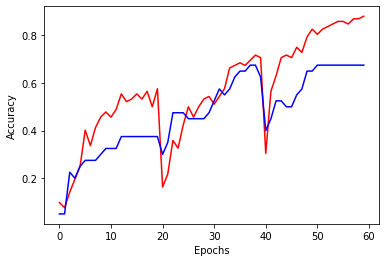

In [17]:
plt.plot(hist.history['accuracy'], color = 'red')
plt.plot(hist.history['val_accuracy'], color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# one hidden layer with 1000 neurons and Relu activation

In [19]:
inp=Input(shape=(input_shape,))
model = Dense(1000,activation='relu')(inp)
model = Dropout(0.3)(model)

model = Dense(10,activation='softmax')(model)

model = Model(inputs=inp,outputs=model)
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
lr=ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=3,verbose=1)
es=EarlyStopping(monitor='val_loss',patience=20,verbose=1)

In [20]:
model.fit(X_train, y_train_nn, epochs = 20, validation_split = .30, callbacks = [hist,lr,es])

Epoch 1/20
3/3 [==============================] - 0s 111ms/step - loss: 2.1612 - accuracy: 0.3587 - val_loss: 2.0492 - val_accuracy: 0.5500
Epoch 2/20
3/3 [==============================] - 0s 13ms/step - loss: 1.8857 - accuracy: 0.6087 - val_loss: 1.8936 - val_accuracy: 0.5750
Epoch 3/20
3/3 [==============================] - 0s 20ms/step - loss: 1.6438 - accuracy: 0.6739 - val_loss: 1.7821 - val_accuracy: 0.6000
Epoch 4/20
3/3 [==============================] - 0s 22ms/step - loss: 1.4310 - accuracy: 0.6848 - val_loss: 1.6987 - val_accuracy: 0.6250
Epoch 5/20
3/3 [==============================] - 0s 20ms/step - loss: 1.3024 - accuracy: 0.6522 - val_loss: 1.6252 - val_accuracy: 0.6250
Epoch 6/20
3/3 [==============================] - 0s 16ms/step - loss: 1.1640 - accuracy: 0.6630 - val_loss: 1.5625 - val_accuracy: 0.6000
Epoch 7/20
3/3 [==============================] - 0s 13ms/step - loss: 1.0600 - accuracy: 0.6848 - val_loss: 1.4902 - val_accuracy: 0.5750
Epoch 8/20
3/3 [==========

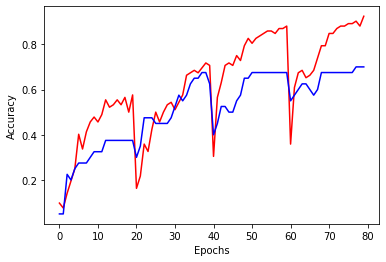

In [21]:
plt.plot(hist.history['accuracy'], color = 'red')
plt.plot(hist.history['val_accuracy'], color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()